In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load datasets
heartrate_seconds = pd.read_csv('heartrate_seconds_merged.csv')
minute_sleep = pd.read_csv('minuteSleep_merged.csv')
sleep_day = pd.read_csv('sleepDay_merged.csv')
weight_log_info = pd.read_csv('weightLogInfo_merged.csv')

In [3]:
# Inspect the first few rows and the column names of each dataset
datasets = [heartrate_seconds, minute_sleep, sleep_day, weight_log_info]
dataset_names = ['heartrate_seconds', 'minute_sleep','sleep_day', 'weight_log_info']

for name, dataset in zip(dataset_names, datasets):
    print(f"{name.upper()}:")
    print(dataset.head())
    print(dataset.columns.tolist())
    print("\n")

HEARTRATE_SECONDS:
           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101
['Id', 'Time', 'Value']


MINUTE_SLEEP:
           Id                  date  value        logId
0  1503960366  4/12/2016 2:47:30 AM      3  11380564589
1  1503960366  4/12/2016 2:48:30 AM      2  11380564589
2  1503960366  4/12/2016 2:49:30 AM      1  11380564589
3  1503960366  4/12/2016 2:50:30 AM      1  11380564589
4  1503960366  4/12/2016 2:51:30 AM      1  11380564589
['Id', 'date', 'value', 'logId']


SLEEP_DAY:
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1         

In [4]:
print(heartrate_seconds.shape)
print(minute_sleep.shape)
print(sleep_day.shape)
print(weight_log_info.shape)

(2483658, 3)
(188521, 4)
(413, 5)
(67, 8)


# Exploratory Data Analysis

#### 1. EDA on Minute Sleep Data

In [5]:
from ydata_profiling import ProfileReport

In [6]:
# Preview the Data
minute_sleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [7]:
profile = ProfileReport(minute_sleep, explorative=True, dark_mode=True) 
profile.to_file('minute_sleep_eda.html')

c:\Users\bhavs\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

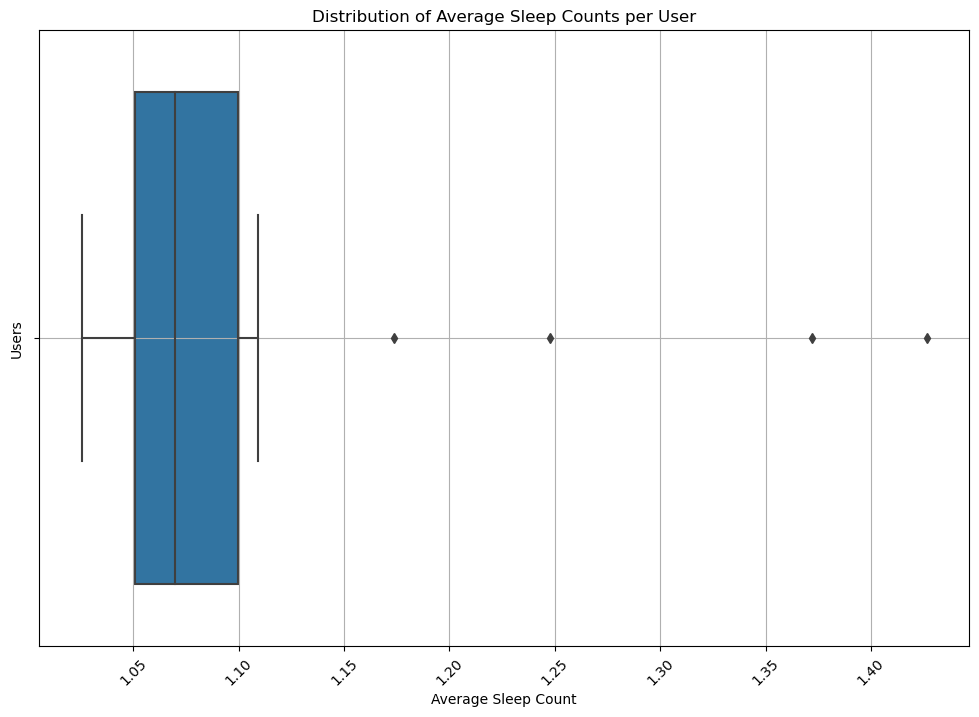

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sleep counts per user
avg_sleep_per_user = minute_sleep.groupby('Id')['value'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='value', data=avg_sleep_per_user)
plt.title('Distribution of Average Sleep Counts per User')
plt.xlabel('Average Sleep Count')
plt.ylabel('Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- The presence of outliers (points outside the "whiskers" of the box plot) indicates users with average sleep counts significantly higher or lower than the majority. These outliers suggest there are users with atypical sleep patterns compared to the rest of the population in the dataset.

In [ ]:
#### 2. EDA on 